In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("loans.csv",index_col="client_id")
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [3]:
df.dtypes

loan_type       object
loan_amount      int64
repaid           int64
loan_id          int64
loan_start      object
loan_end        object
rate           float64
dtype: object

In [4]:
df["loan_id"] = df["loan_id"].astype("object")
df["repaid"] = df["repaid"].astype("category")

In [5]:
df["loan_start"] = pd.to_datetime(df["loan_start"],format="%Y-%m-%d")
df["loan_end"] = pd.to_datetime(df["loan_end"],format="%Y-%m-%d")

In [6]:
df.dtypes

loan_type              object
loan_amount             int64
repaid               category
loan_id                object
loan_start     datetime64[ns]
loan_end       datetime64[ns]
rate                  float64
dtype: object

In [7]:
df.describe()

,loan_amount,loan_start,loan_end,rate
count,443.000000,443,443,443.000000
mean,7982.311512,2007-08-02 12:56:53.092550912,2009-08-23 11:35:37.246049536,3.217156
min,559.000000,2000-01-26 00:00:00,2001-08-02 00:00:00,0.010000
25%,4232.500000,2003-10-19 00:00:00,2005-09-12 12:00:00,1.220000
50%,8320.000000,2007-03-10 00:00:00,2009-03-19 00:00:00,2.780000
75%,11739.000000,2011-07-31 00:00:00,2013-09-11 12:00:00,4.750000
max,14971.000000,2014-11-11 00:00:00,2017-05-07 00:00:00,12.620000
std,4172.891992,NaN,NaN,2.397168


In [8]:
df.describe(exclude=[np.number])

,loan_type,repaid,loan_id,loan_start,loan_end
count,443,443.0,443.0,443,443
unique,4,2.0,443.0,NaN,NaN
top,home,1.0,10243.0,NaN,NaN
freq,121,237.0,1.0,NaN,NaN
mean,NaN,NaN,NaN,2007-08-02 12:56:53.092550912,2009-08-23 11:35:37.246049536
min,NaN,NaN,NaN,2000-01-26 00:00:00,2001-08-02 00:00:00
25%,NaN,NaN,NaN,2003-10-19 00:00:00,2005-09-12 12:00:00
50%,NaN,NaN,NaN,2007-03-10 00:00:00,2009-03-19 00:00:00
75%,NaN,NaN,NaN,2011-07-31 00:00:00,2013-09-11 12:00:00
max,NaN,NaN,NaN,2014-11-11 00:00:00,2017-05-07 00:00:00


In [9]:
df.isnull().sum()

loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64

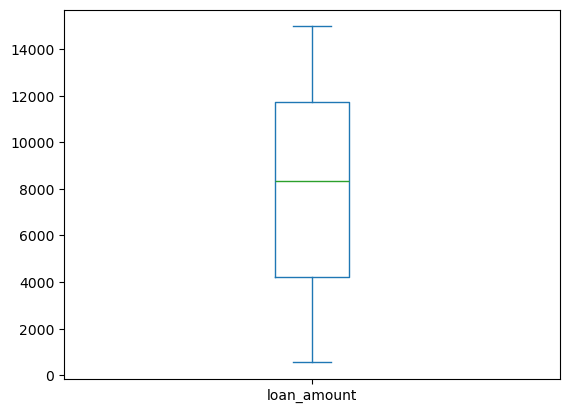

In [10]:
df["loan_amount"].plot(kind="box");

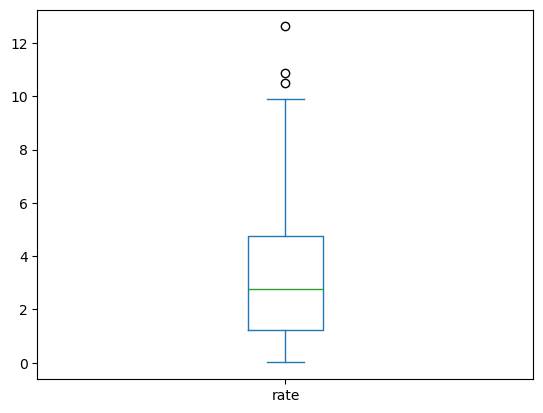

In [11]:
df["rate"].plot(kind="box");

In [12]:
df["sqrate"]= df["rate"]**0.5

In [13]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,sqrate
client_id,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181


In [14]:
print("skew ",df.rate.skew() )
print("skew ",df.sqrate.skew() )

skew  0.884204614329943
skew  0.04964154055528862


In [15]:
print("kurt ",df.rate.kurt() )
print("kurt ",df.sqrate.kurt() )


kurt  0.4243716514373652
kurt  -0.6318437642052039


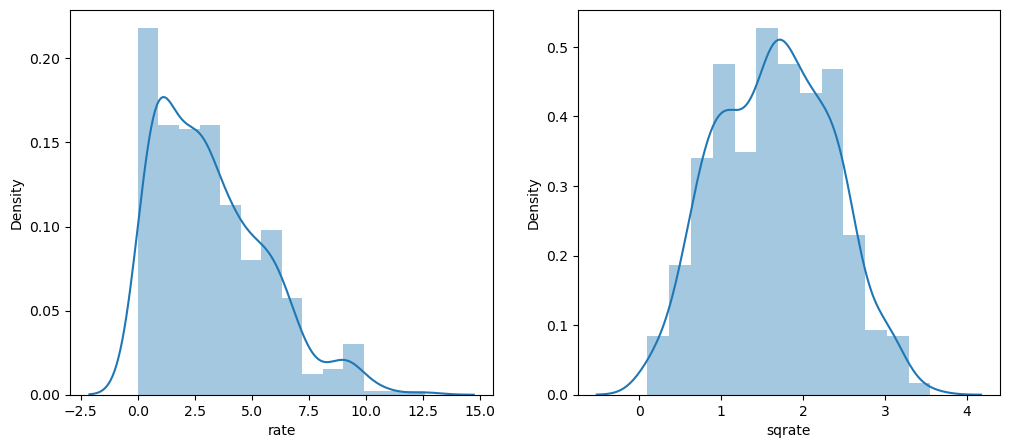

In [16]:
fig , ax = plt.subplots(1,2,figsize=(12,5))
sns.distplot(df["rate"],ax=ax[0])
sns.distplot(df["sqrate"],ax=ax[1])
plt.show()

In [17]:
df["lograte"] = np.log(df["rate"])

In [18]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,sqrate,lograte
client_id,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,0.765468
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,0.223144
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,-0.385662
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,0.215111
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.141033


In [19]:
print("skew ",df.rate.skew() )
print("skew ",df.sqrate.skew() )
print("skew ",df.lograte.skew() )

print("kurt ",df.rate.kurt() )
print("kurt ",df.sqrate.kurt() )
print("kurt ",df.lograte.kurt() )


skew  0.884204614329943
skew  0.04964154055528862
skew  -1.5943217626331552
kurt  0.4243716514373652
kurt  -0.6318437642052039
kurt  4.157026150198228


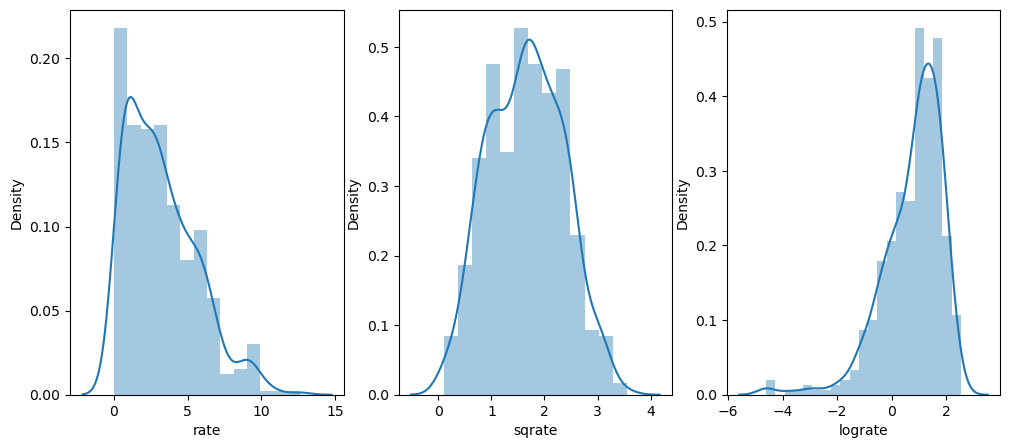

In [20]:
fig , ax = plt.subplots(1,3,figsize=(12,5))
sns.distplot(df["rate"],ax=ax[0])
sns.distplot(df["sqrate"],ax=ax[1])
sns.distplot(df["lograte"],ax=ax[2])
plt.show()

In [21]:
df2 = pd.read_csv("loans.csv",index_col="client_id")
df2.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [22]:
df["loan_start"] = pd.to_datetime(df["loan_start"],format="%Y-%m-%d")
df["loan_end"] = pd.to_datetime(df["loan_end"],format="%Y-%m-%d")
df["loan_id"] = df["loan_id"].astype("object")
df["repaid"] = df["repaid"].astype("category")

In [23]:
df.dtypes

loan_type              object
loan_amount             int64
repaid               category
loan_id                object
loan_start     datetime64[ns]
loan_end       datetime64[ns]
rate                  float64
sqrate                float64
lograte               float64
dtype: object

In [24]:
import scipy.stats as stats

In [25]:
df2["zs"] = stats.zscore(df2["rate"])

In [26]:
df2.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,zs
client_id,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,-0.445677
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,-0.821544
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,-1.059594
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,-0.825721
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,-0.036399


<Axes: >

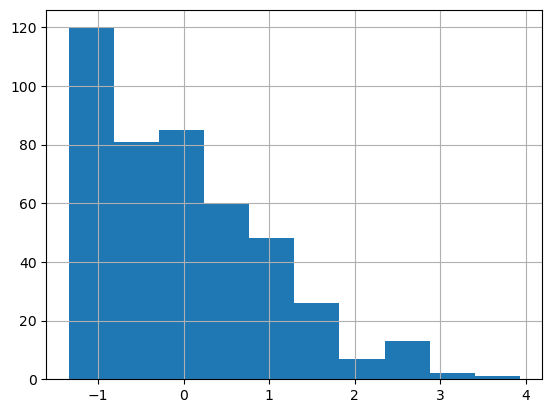

In [27]:
df2["zs"].hist()

In [28]:
df2[(df2["zs"]>3)|(df2["zs"]<-3)]

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,zs
client_id,,,,,,,,
41480,credit,2947,1,10302,2005-11-10,2008-03-16,10.49,3.037362
48177,other,6318,0,10224,2003-02-02,2005-05-08,10.89,3.204415
49624,home,8133,1,10312,2009-03-14,2011-03-21,12.62,3.926916


In [29]:
df2[(df2["zs"]>3)|(df2["zs"]<-3)].shape[0]

3

In [30]:
df3 = df2[(df2["zs"]<3)&(df2["zs"]>-3)].reset_index()
df3.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,zs
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,-0.445677
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,-0.821544
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,-1.059594
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,-0.825721
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,-0.036399


In [31]:
df4 = df3.copy()

In [32]:
df4.drop(columns=["zs"],inplace=True)
df4.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [33]:
q1 = df4.rate.quantile(0.25)
q2 = df4.rate.quantile(0.50)
q3 = df4.rate.quantile(0.75)

In [34]:
IQR= q3-q1

In [35]:
LC = q1 - (1.5*IQR)
HC = q3 + (1.5*IQR)

In [36]:
print(LC)
display(LC)
display(HC)

-3.9762499999999994


-3.9762499999999994

9.87375

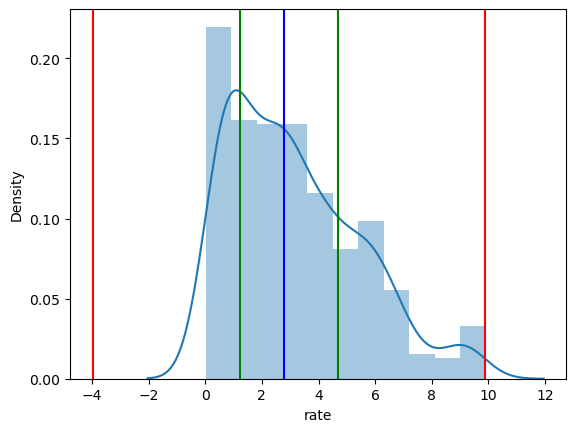

In [37]:
sns.distplot(df4.rate)
plt.axvline(HC,color="r")
plt.axvline(LC,color="r")
plt.axvline(q2,color="b")
plt.axvline(q1,color="g")
plt.axvline(q3,color="g")

In [38]:
df4[(df4["rate"]>HC) | (df4["rate"]<LC)].reset_index(drop=True)

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,39505,cash,11647,1,11928,2003-07-28,2005-12-24,9.91


In [90]:
df5 = df4[(df4["rate"]<HC) & (df4["rate"]>LC)]
df5.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [92]:
df4.shape

(440, 8)

In [94]:
df5.shape

(439, 8)

<Axes: >

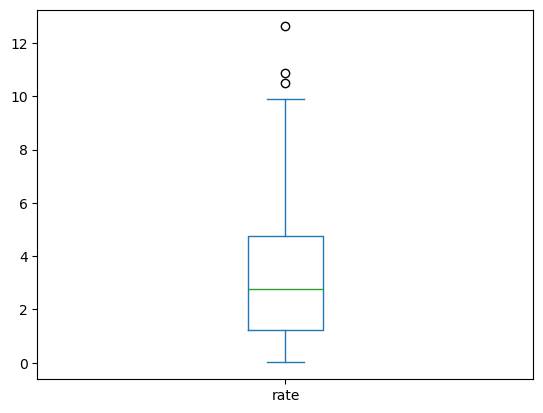

In [102]:
df2["rate"].plot(kind="box")

<Axes: >

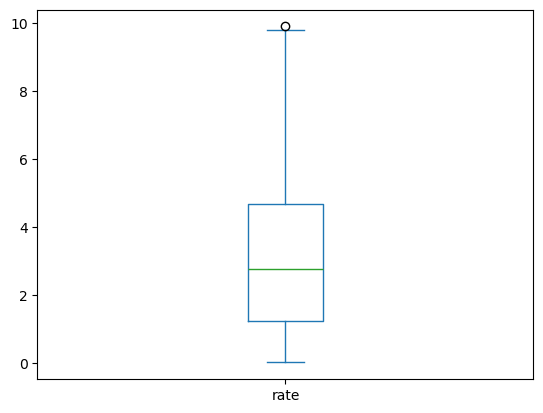

In [104]:
df4["rate"].plot(kind="box")

<Axes: >

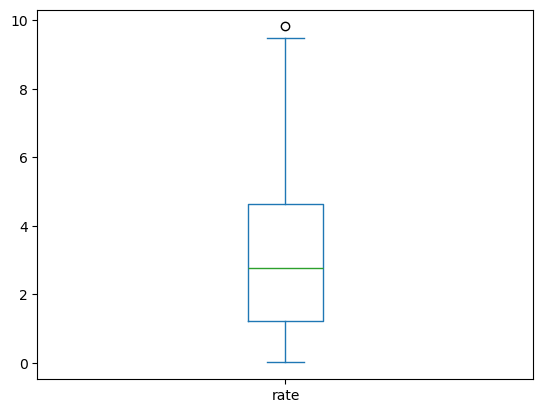

In [106]:
df5["rate"].plot(kind="box")

In [108]:
avg_rate = df4["rate"].mean()
avg_rate

3.161818181818182

In [110]:
std_rate = df4["rate"].std()
std_rate

2.307947418822915

In [112]:
df4["zs_rate"]=(df4["rate"]-avg_rate)/ std_rate
df4.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,zs_rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,-0.438406
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,-0.828363
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,-1.075336
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,-0.832696
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,-0.013786


In [114]:
print("skew ",df4.rate.skew() )
print("skew ",df4.zs_rate.skew() )

print("kurt ",df4.rate.kurt() )
print("kurt ",df4.zs_rate.kurt() )


skew  0.7594062707815686
skew  0.7594062707815692
kurt  -0.05964248048746912
kurt  -0.05964248048746734
